In [1]:
from nutils import *
import numpy, unittest

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections

In [2]:
nelems = 20
degree = 1
tol  = 1e-5
ndims = 1

In [3]:
domain, geom = mesh.rectilinear([numpy.linspace(0,1,nelems+1)]*ndims)

In [4]:
# prepare residual
ns = function.Namespace()
ns.x = geom
ns.basis = domain.basis('discont', degree=degree)
ns.u = 'basis_n ?lhs_n'
ns.C = 200
ns.f = ' (6.28)^2 sin( 6.28 x_0 )'
ns.g = ' 0 '

In [6]:
# construct residual and inertia vector
res = domain.integral('basis_n,0 u_,0 - basis_n f' @ ns, geometry=ns.x, degree=5)
res += domain.interfaces.integral('-[basis_n] n_0 {u_,0} - {basis_n,0} n_0 [u]' @ ns, geometry=ns.x, degree=5)

# C0 continuity residual
res += domain.interfaces.integral('C [basis_n] [u] n_0' @ ns, geometry=ns.x, degree=5)

# boundary
res += domain.boundary.integral('basis_n (0.5 (g + u_,0)) n_0' @ ns, geometry=ns.x, degree=degree*2)
res += domain.boundary.integral('0.5 basis_n,0 (g - u) n_0' @ ns, geometry=ns.x, degree=degree*2)
res += domain.boundary.integral('- C basis_n,0 (g - u) n_0' @ ns, geometry=ns.x, degree=degree*2)

solve > solver returned with residual 1e-13


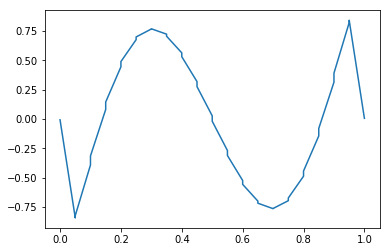

In [7]:
# find lhs such that res == 0 and substitute this lhs in the namespace
lhs = solver.solve_linear('lhs', res)
ns = ns(lhs=lhs)

# plot solution
bezier = domain.sample('bezier', 9)
x, u = bezier.eval([ns.x, ns.u])
plt.plot(x, u)
# plt.ylim(-2,2)